<a href="https://colab.research.google.com/github/gurpinder95/my-1st-Data-science/blob/main/practice_kmeans.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from matplotlib import pyplot as plt

In [4]:
univ=pd.read_csv("/Universities.csv")

In [5]:
### Normalisation using standard
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler_univ=scaler.fit_transform(univ.iloc[:,1:])

In [6]:
wcss=[]
for i in range(1,11):
  kmeans=KMeans(n_clusters=i,random_state=0)
  kmeans.fit(scaler_univ)
  wcss.append(kmeans.inertia_)

In [ ]:
wcss

[150.0,
 64.14528395010268,
 44.531761731450956,
 33.654341806512235,
 28.622383307274227,
 22.704584217335714,
 18.56891703085987,
 16.171397616965237,
 13.47880438976081,
 11.025256225196053]

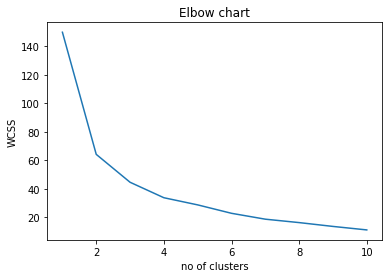

In [7]:
plt.plot(range(1,11),wcss)
plt.title("Elbow chart")
plt.xlabel("no of clusters")
plt.ylabel("WCSS")
plt.show()


In [ ]:
# Build cluster algorithm
from sklearn.cluster import KMeans
cluster_new=KMeans(4,random_state=42)
cluster_new.fit(scaler_univ)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=42, tol=0.0001, verbose=0)

In [ ]:
cluster_new.labels_

array([0, 3, 2, 0, 2, 0, 0, 2, 0, 3, 0, 2, 2, 1, 0, 1, 0, 1, 2, 2, 2, 2,
       2, 1, 0], dtype=int32)

In [ ]:
cluster_new.cluster_centers_      # this will give centers of each cluster with 6 dimesnsions since data is 6 columns

array([[ 0.80273428,  0.68086062, -0.90136381, -0.43159988,  0.44062556,
         0.79526289],
       [-1.93029211, -1.98148647,  1.59348244,  1.63857398, -1.23359906,
        -1.68680366],
       [-0.12658888,  0.06407139,  0.2224667 ,  0.04516743, -0.38064332,
         0.02028221],
       [ 0.88122441,  0.5787432 , -0.24316128, -1.56078563,  2.38759968,
        -0.3064867 ]])

In [ ]:
univ["clusterid"]=cluster_new.labels_

In [ ]:
univ

,Univ,SAT,Top10,Accept,SFRatio,Expenses,GradRate,clusterid
0,Brown,1310,89,22,13,22704,94,0
1,CalTech,1415,100,25,6,63575,81,3
2,CMU,1260,62,59,9,25026,72,2
3,Columbia,1310,76,24,12,31510,88,0
4,Cornell,1280,83,33,13,21864,90,2
5,Dartmouth,1340,89,23,10,32162,95,0
6,Duke,1315,90,30,12,31585,95,0
7,Georgetown,1255,74,24,12,20126,92,2
8,Harvard,1400,91,14,11,39525,97,0
9,JohnsHopkins,1305,75,44,7,58691,87,3


In [ ]:
univ.groupby(["clusterid"]).mean()

,SAT,Top10,Accept,SFRatio,Expenses,GradRate
clusterid,,,,,,
0,1351.666667,89.444444,21.777778,11.00,33615.555556,93.777778
1,1061.500000,38.750000,70.000000,19.25,9953.000000,71.750000
2,1253.000000,77.700000,43.500000,12.90,22008.200000,86.900000
3,1360.000000,87.500000,34.500000,6.50,61133.000000,84.000000


In [ ]:
univ[univ["clusterid"]==3]

,Univ,SAT,Top10,Accept,SFRatio,Expenses,GradRate,clusterid
1,CalTech,1415,100,25,6,63575,81,3
9,JohnsHopkins,1305,75,44,7,58691,87,3
